In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from html.parser import HTMLParser
from bs4 import BeautifulSoup
import os
import pandas as pd
import csv
#import pickle

In [3]:
def is_school(detail):
    if 'academy' in detail.lower() or 'college' in detail.lower() or 'university' in d.lower():
        return 1
    else:
        return 0

def school_or_job(detail):
    if ' at ' in detail.lower() or '.com' in detail.lower() or ' inc' in detail.lower():
        return 'job'
    elif 'academy' in d.lower() or 'college' in d.lower() or 'university' in d.lower():
        return 'school'
    else:
        return 'job'

def get_suitor_info(directory):
    all_entries = {}
    #file_list= []
    like_list = []
    new_profile = []
    #my_dir = os.getcwd()

    #retrieve every record of a suitor from every profile#.html file
    #like_list is a list in which each element is a list of the details of a suitor
    for file in os.listdir(directory):
        if file.endswith(".html"):
            new_file_indicator = True
            #file_list.append(os.path.join(directory, file))
            profile = open(os.path.join(directory, file),'r',encoding='utf8',errors='ignore')
            source_code = profile.read()
            profile.close()
            soup = BeautifulSoup(source_code, 'html.parser')
            name_list = soup.find_all('span')
            profile_image_counter = 0
            background_images = {}
            for a in name_list:
                div_list = a.find_all('div')
                for aa in div_list:
                    keys = aa.attrs
                    if "style" in keys:
                        if "background-image" in aa["style"]:
                            profile_image_counter += 1
                            #split1 = aa["style"].rpartition("/")
                            #split2 = split1[2].rpartition('"')
                            split1 = aa["style"].partition('"')
                            split2 = split1[2].rpartition('"')
                            background_images[profile_image_counter] = split2[0]
                        
                keys = a.attrs
                if "class" in keys:
                    if new_file_indicator:
                        if new_profile:
                            like_list.append(new_profile)
                            new_profile = []
                        new_file_indicator = False
                        profile_counter = 0
                    if "recCard__name" in a["class"]:
                        like_list.append(new_profile)
                        new_profile = [file]
                        profile_counter += 1
                        new_profile.append(profile_counter)
                        if profile_counter in background_images.keys():
                            new_profile.append(background_images[profile_counter])
                        else:
                            print(directory)
                            print(file)
                            print(profile_counter)
                            print(background_images)
                            print()
                            new_profile.append(float('nan'))
                        new_profile.append(a.string)
                    elif "recCard__age" in a["class"]:
                        if bool(a.string):
                            new_profile.append(int(a.string[2:]))
                        else:
                            new_profile.append(a.string)
                    elif "Fz($ms)" in a["class"] or " W(100%)" in a["class"] or "D(b)" in a["class"]:
                        new_profile.append(a.string)
                        #if " instagram photos" in a.string:
                            #do something
                        #elif 
    if new_profile:
        like_list.append(new_profile)

    #organize all the records in like_list by filename
    #all_entries is a dictionary that has the filename as its key and a list of entries from like_list as its value
    profile_number = 'blah'
    for b in like_list:
        if b:
            if b[0] != profile_number:
                profile_number = b[0]
                all_entries[profile_number] = []
            all_entries[profile_number].append(b[1:])

    #get the 2nd suitor record of each file
    #suitor_list is the actual list of liked suitors
    num_columns = 0
    suitor_list = []
    for c in all_entries:
        suitor = [c]
        suitor.extend(all_entries[c][1])
        suitor_list.append(suitor)
        if len(all_entries[c][1]) > num_columns:
            num_columns = len(all_entries[c][1])

    #make number of columns data dependent
    columns = ['filename', 'file_position', 'profile_image','name', 'age']
    detail_number = 1
    while len(columns) <= num_columns:
        columns.append('detail_' + str(detail_number))
        detail_number += 1

    #write the record of every swipe
    suitor_df = pd.DataFrame(suitor_list,columns=columns)
    suitor_df.to_csv('all_suitors.csv', header=True, index=False)

    #fill in missing values to enable counting of unique profiles
    suitor_df = suitor_df.fillna('NO DATA')

    #count the number of unique profiles
    #write the record of unique profiles in the run, including the number of times that profile appears
    #groupby_list = columns[1:]
    groupby_list = columns[2:]
    unique_suitors = suitor_df.groupby(groupby_list)['filename'].count()
    unique_suitors.to_csv('unique_suitors.csv', header=True)

    #write the record of profiles that appeared more than once during the run
    duplicate_suitors = unique_suitors[unique_suitors>1]
    duplicate_suitors.to_csv('duplicate_suitors.csv', header=True)

    #write all records of all suitors in every profile#.html file
    #not sure how to handle strange characters-- ignoring for now
    with open('original_suitor_records.csv', 'w', newline='',errors='ignore') as original_suitor_records:
        wr = csv.writer(original_suitor_records)
        wr.writerow(columns)
        for d in like_list:
            if d:
                wr.writerow(d)
    
    return unique_suitors, duplicate_suitors, suitor_df, all_entries

In [4]:
complete_records = {}
directories = os.walk(os.getcwd())
for folder in directories:
    #print(folder)
    current_dir = folder[0]
    subfolders = folder[1]
    contents = folder[2]
    if contents:
        if any('.html' in file for file in contents):
            complete_records[current_dir] = get_suitor_info(current_dir)

C:\MIDS\W241\final_project\Analysis\NoEdu\Female\LosAngeles
profile22.html
2
{1: 'https://images-ssl.gotinder.com/5921f5ddcee27fe44804a4cf/1080x1080_0b4d5a53-4104-4ded-8b40-7aebae9cd74d.jpg'}

C:\MIDS\W241\final_project\Analysis\NoEdu\Female\LosAngeles
profile22.html
3
{1: 'https://images-ssl.gotinder.com/5921f5ddcee27fe44804a4cf/1080x1080_0b4d5a53-4104-4ded-8b40-7aebae9cd74d.jpg'}

C:\MIDS\W241\final_project\Analysis\NoEdu\Female\LosAngeles
profile23.html
1
{}

C:\MIDS\W241\final_project\Analysis\NoEdu\Female\LosAngeles
profile23.html
2
{}

C:\MIDS\W241\final_project\Analysis\NoEdu\Female\LosAngeles
profile23.html
3
{}

C:\MIDS\W241\final_project\Analysis\NoEdu\Female\Philadelphia
profile72.html
2
{1: 'https://images-ssl.gotinder.com/55994b449255da0d4e22aa59/599fca0e-bedf-4cdd-8547-a7c4d48a4f9b.jpg'}

C:\MIDS\W241\final_project\Analysis\NoEdu\Female\Philadelphia
profile72.html
3
{1: 'https://images-ssl.gotinder.com/55994b449255da0d4e22aa59/599fca0e-bedf-4cdd-8547-a7c4d48a4f9b.jpg'}

C

In [5]:
len(complete_records.keys())

56

In [6]:
all_details = []
for d in complete_records:
    unique_suitors = complete_records[d][0]
    for dd in range(3,len(unique_suitors.index.names)):
        all_details.extend(unique_suitors.index.get_level_values(dd).tolist())

In [13]:
unique_details = list(set(all_details))

In [20]:
unique_details

['174 Instagram Photos',
 'Video editor',
 'Bradley University',
 'Berghs',
 'Real Estate Specialist/Agent at Rodeo Realty Sunset Strip',
 'AT&T',
 'Ink Masters show on Spike Tv',
 'Healthcare Assistant',
 'operations manager at goPuff',
 'Institute of Culinary Education',
 'UCAM - Universidade Candido Mendes',
 'Transportation Management at Amazon.com',
 '名古屋商科大学',
 'Datassential Research',
 'Claremont McKenna College',
 'FEKT VUT Brno',
 'LUZ VE',
 'Hunter College',
 'Bank Street College of Education',
 'Eugene Lang College The New School for Liberal Arts',
 'Esthetician',
 'Northern Illinois University',
 'FEAA, Al. I. Cuza, Iasi',
 'Owner at Aldea Weddings',
 "Backline Tech at Gun's & Roses",
 'NewFrontier Ventures',
 'JWU North Miami',
 'Hardin-Simmons University',
 'Yext',
 'Tax Lawyer',
 'Central Florida',
 'Millwright at Zachry',
 'State Farm',
 'University of Michigan',
 'Mossuto Chiropractic & Wellness Center',
 'Property Manager',
 'Cal State Long Beach',
 '3 Instagram Photo

In [27]:
details_1 = []
for ddd in unique_details:
    if not 'Instagram Photos' in ddd:
        #print(True)
        details_1.append(ddd)
    #else:
        #details_1.extend(ddd)

In [34]:
details_1.sort()
details_1

['\n',
 "\n\\f2 \\'91\\'e9\\'ca\\'bf\n\\f0 Senshi at Kuwait City",
 '1st & 5th grade English Teacher at Colegio Bilingue Howard Gardner',
 '2014 Corps Member at Teach For America',
 '276k at Diamond Supply Co',
 '3rd Grade Teacher at Alief ISD',
 '4th Grade Teacher at Uncommon Schools',
 '800 Degrees Pizza',
 "A'alona Massage Therapy Training and Resource Center",
 'AAR at Kaiser CSC',
 'ABH at U.S. Navy',
 'ADP',
 'AIG',
 'AJ Reality TV',
 'AJATC',
 'AMDA',
 'AMP - Airline MRO Parts',
 'AMR San Diego',
 'ASU \nSCC',
 'ASU Downtown Phoenix Campus',
 'AT&T',
 'Aarhus Universitet',
 'Above & Beyond Banquets, Catering, Events',
 'Academic advisor',
 'Academy of Mary Immaculate',
 'Accela Software',
 'AcceleratedPharmaceuticals LLC',
 'Accenture',
 'Accenture Federal Services',
 'Accessory Supervisor at Audi North Houston',
 'Account Analyst',
 'Account Community Development Manager at PepsiCo',
 'Account Coordinator at Oil and Gas',
 'Account Executive at AT&T',
 'Account Executive/Sales 

In [32]:
details_1[0].lower()

'video editor'

In [36]:
detail_types = {}
for d in details_1:
    if ' at ' in d.lower() or '.com' in d.lower() or ' inc' in d.lower():
        detail_types[d] = 'job'
    elif 'academy' in d.lower() or 'college' in d.lower() or 'university' in d.lower():
        detail_types[d] = 'school'
    else:
        detail_types[d] = 'job'
detail_types

{'\n': 'job',
 "\n\\f2 \\'91\\'e9\\'ca\\'bf\n\\f0 Senshi at Kuwait City": 'job',
 '1st & 5th grade English Teacher at Colegio Bilingue Howard Gardner': 'job',
 '2014 Corps Member at Teach For America': 'job',
 '276k at Diamond Supply Co': 'job',
 '3rd Grade Teacher at Alief ISD': 'job',
 '4th Grade Teacher at Uncommon Schools': 'job',
 '800 Degrees Pizza': 'job',
 "A'alona Massage Therapy Training and Resource Center": 'job',
 'AAR at Kaiser CSC': 'job',
 'ABH at U.S. Navy': 'job',
 'ADP': 'job',
 'AIG': 'job',
 'AJ Reality TV': 'job',
 'AJATC': 'job',
 'AMDA': 'job',
 'AMP - Airline MRO Parts': 'job',
 'AMR San Diego': 'job',
 'ASU \nSCC': 'job',
 'ASU Downtown Phoenix Campus': 'job',
 'AT&T': 'job',
 'Aarhus Universitet': 'job',
 'Above & Beyond Banquets, Catering, Events': 'job',
 'Academic advisor': 'job',
 'Academy of Mary Immaculate': 'school',
 'Accela Software': 'job',
 'AcceleratedPharmaceuticals LLC': 'job',
 'Accenture': 'job',
 'Accenture Federal Services': 'job',
 'Accesso

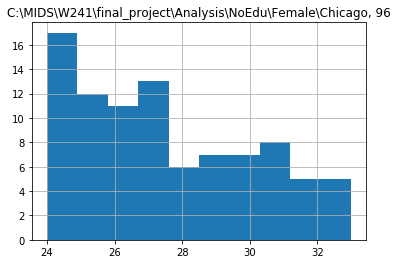

In [8]:
all_details = []
plt.figure()
for d in complete_records:
    unique_suitors = complete_records[d][0]
    for dd in range(3,len(unique_suitors.index.names)):
        all_details.extend(unique_suitors.index.get_level_values(dd).tolist())
    
    edu_sex_city_df = complete_records[d][2]
    edu_sex_city_df = edu_sex_city_df.drop(['filename', 'file_position'], axis=1)
    edu_sex_city_df = edu_sex_city_df.drop_duplicates()
    edu_sex_city_df = edu_sex_city_df.reindex(range(len(edu_sex_city_df)))
    suitor_ages = edu_sex_city_df['age']
    num_suitors = len(complete_records[d][0])
    if suitor_ages.dtypes == 'object':
        for f in range(len(suitor_ages)):
            #print(type(f))
            if type(suitor_ages[f]) is str:
                suitor_ages[f] = float('nan')
    plt.figure(d)
    #print(len(edu_sex_city_df))
    edu_sex_city_df['age'].hist()
    plt.title(d + ', ' + str(num_suitors))
    #print()

In [11]:
print(complete_records.keys())

dict_keys(['C:\\MIDS\\W241\\final_project\\Analysis\\NoEdu\\Female\\Chicago'])


In [14]:
unique_suitors = complete_records['C:\\MIDS\\W241\\final_project\\Analysis\\NoEdu\\Female\\Chicago'][0]
duplicate_suitors = complete_records['C:\\MIDS\\W241\\final_project\\Analysis\\NoEdu\\Female\\Chicago'][1]
suitor_df = complete_records['C:\\MIDS\\W241\\final_project\\Analysis\\NoEdu\\Female\\Chicago'][2]
all_entries = complete_records['C:\\MIDS\\W241\\final_project\\Analysis\\NoEdu\\Female\\Chicago'][3]

In [64]:
unique_suitors.index.names

FrozenList(['profile_image', 'name', 'age', 'detail_1', 'detail_2'])

In [53]:
type(unique_suitors)

pandas.core.series.Series

In [57]:
unique_suitors.index.get_level_values(4).tolist()

['University of Illinois at Chicago',
 'NO DATA',
 'NO DATA',
 'Robert Morris University Illinois',
 'University of Illinois at Urbana-Champaign',
 'NO DATA',
 'Mississippi State University',
 'Arizona State University',
 'University of Illinois at Urbana-Champaign',
 'University of Arkansas',
 'Indiana University',
 'Michigan State University',
 'Wayne State University School of Medicine',
 'NO DATA',
 'University of Illinois at Urbana-Champaign',
 'NO DATA',
 'NO DATA',
 'NO DATA',
 '1,025 Instagram Photos',
 'Indiana University (Bloomington)',
 'NO DATA',
 '120 Instagram Photos',
 'NO DATA',
 'University of Notre Dame',
 'NO DATA',
 '82 Instagram Photos',
 'Illinois State University',
 'Boston College',
 'Chicago-Kent College of Law',
 'NO DATA',
 'NO DATA',
 'University of Illinois at Urbana-Champaign',
 'The University of Edinburgh',
 "University of Nebraska\\'96Lincoln",
 'Washington University in St. Louis',
 'University of Illinois at Chicago',
 '33 Instagram Photos',
 'Univers

In [51]:
pd.DataFrame(unique_suitors).shape

(96, 1)

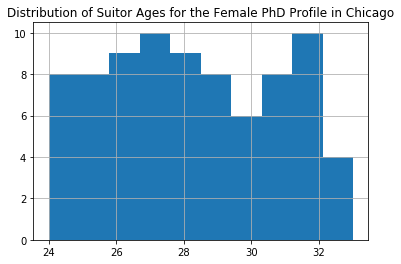

In [11]:
plt.figure()
phd_female_chicago['age'].hist()
plt.title('Distribution of Suitor Ages for the Female PhD Profile in Chicago')

In [37]:
phd_female_chicago.reindex(range(len(phd_female_chicago)))

,name,age,detail_1,detail_2
0,Jake,25.0,SEO Analyst,Webster University
1,Tom,25.0,University of Chicago,NO DATA
2,Ryan,28.0,Sales,Northern Illinois University
3,David,24.0,Audit Associate at Topel Forman LLC,University of North Florida
4,Avet,29.0,Software Engineer,The University of Chicago
5,Chris,25.0,York College of Pennsylvania,NO DATA
6,Jose,31.0,University of Chicago Booth School of Business,NO DATA
7,Adam,27.0,Apollo Global Management,NO DATA
8,CJ,27.0,Field Account Executive at SHI International C...,Western Michigan University
9,Jeff,31.0,Personal Trainer at Equinox Fitness Club,Robert Morris College


In [6]:
for d in complete_records:
    print(d)
    print()

C:\MIDS\W241\final_project\Analysis\MD\Female\Chicago

C:\MIDS\W241\final_project\Analysis\MD\Female\Houston

C:\MIDS\W241\final_project\Analysis\MD\Female\LosAngeles

C:\MIDS\W241\final_project\Analysis\MD\Female\NewYork

C:\MIDS\W241\final_project\Analysis\MD\Female\Philadelphia

C:\MIDS\W241\final_project\Analysis\MD\Female\Phoenix

C:\MIDS\W241\final_project\Analysis\MD\Female\SanAntonio

C:\MIDS\W241\final_project\Analysis\MD\Female\SanDiego

C:\MIDS\W241\final_project\Analysis\MD\Male_original\Antonio

C:\MIDS\W241\final_project\Analysis\MD\Male_original\Chicago

C:\MIDS\W241\final_project\Analysis\MD\Male_original\Diego

C:\MIDS\W241\final_project\Analysis\MD\Male_original\Diego\Extras

C:\MIDS\W241\final_project\Analysis\MD\Male_original\Houston

C:\MIDS\W241\final_project\Analysis\MD\Male_original\LA

C:\MIDS\W241\final_project\Analysis\MD\Male_original\NY

C:\MIDS\W241\final_project\Analysis\MD\Male_original\NY\Extras

C:\MIDS\W241\final_project\Analysis\MD\Male_original\Phil